## AirBnB Listings' Analysis 

### Project Summary
As AirBnB has grown in popularity, it has increasingly become the focus of regulations designed to limit the number of properties listed in each city. The objective of this project is to analyze Paris listings, with a focus on pricing. The project will further aim to visually summarize factors affecting pricing and whether regulations adopted in 2015 impacted listings in Paris market. 

**Note:**
In 2015, Paris implemented several regulations to address the rapid growth and impact of short-term rental platforms like AirBnB. These regulations were designed to balance the benefits of short-term rentals with concerns about housing availability, neighborhood disruptions, and fair competition with traditional hospitality businesses. In summary, the 2015 regulations in Paris marked a significant step in managing the burgeoning short-term rental market, aiming to protect the housing supply for residents and maintain neighborhood quality of life while allowing homeowners to benefit from the sharing economy.

### Objectives:
1. Explore and profile the data to correct any quality issues.
2. Prepare and reformat the data for visualization.
3. Visualize the data and identify key insights and recommendations.

### The Data Set:
AirBnB data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type.
(Source: Inside AirBnB)

### Objective 1

Read in the AirBnB listings data, calculate basic profiling metrics, change column datatypes as necessary, and filter down to only Paris Listings

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Import and append listings_1.csv and listings_2.csv files
listings1=pd.read_csv('../AirBnB_Listings/AirBnB_Data/listings_1.csv',encoding = 'unicode_escape', low_memory=False, parse_dates=['host_since'])
listings2=pd.read_csv('../AirBnB_Listings/AirBnB_Data/listings_2.csv',encoding = 'unicode_escape', low_memory=False, parse_dates=['host_since'])
listings=pd.concat([listings1,listings2])

In [22]:
# Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

paris_listings = listings[listings['city'] == 'Paris'].loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
paris_listings['host_since'] = pd.to_datetime(paris_listings['host_since'], format='%d-%m-%Y', errors='coerce')

In [23]:
# Calculate the minimum, maximum, and average for each numeric field
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [24]:
paris_listings.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 103914
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 10.0 MB


In [25]:
# Check for missing values
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [26]:
# Check for count of rows with 'accomodates' and 'price' equal 0.
print((paris_listings["accommodates"] == 0).sum(), (paris_listings["price"] == 0).sum())

54 62


33 rows have *'host_since'* date missing, 54 rows have *'accommodates' = 0* and 62 rows have *'price' = 0*. Since this is insignificant compared to the data volume, I am going to ignore these errors.

### Objective 2

Produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

In [27]:
# Create a table named 'paris_listings_neighbourhood' that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

paris_listings_neighbourhood = paris_listings.groupby('neighbourhood').agg({'price': 'mean'}).sort_values(by = 'price')
paris_listings_neighbourhood

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


In [28]:
# Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, 
# and add the mean price for each value of ‘accommodates’ (sorted low to high)

paris_listings_accomodations = paris_listings.query("neighbourhood == 'Elysee'").groupby('accommodates').agg({'price': 'mean'}).sort_values(by = 'price')
paris_listings_accomodations

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


In [29]:
# Create a table called paris_listings_over_time grouped by the ‘host_since’ year, 
# and calculate the average price and count of rows representing the number of new hosts.

paris_listings_over_time = paris_listings.set_index('host_since').resample('Y').agg({'neighbourhood': 'count', 'price': 'mean'})
paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


### Objective 3

Build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

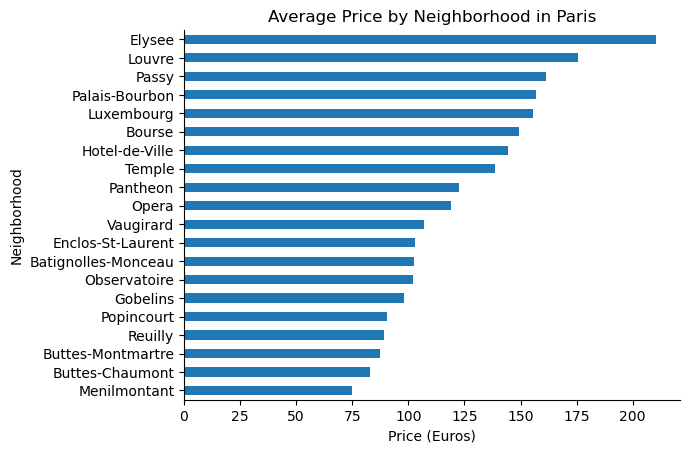

In [30]:
# Create a horizontal bar chart of the average price by neighborhood in Paris..

paris_listings_neighbourhood.plot.barh(
    title = 'Average Price by Neighborhood in Paris',
    xlabel = 'Price (Euros)',
    ylabel = 'Neighborhood',
    legend = None
)
sns.despine()

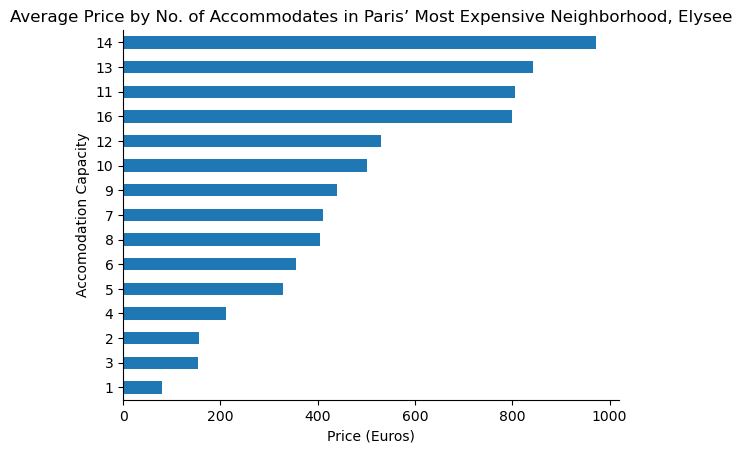

In [31]:
# Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood.
paris_listings_accomodations.loc[1:].plot.barh(
    title = 'Average Price by No. of Accommodates in Paris’ Most Expensive Neighborhood, Elysee',
    xlabel = 'Price (Euros)',
    ylabel = 'Accomodation Capacity',
    legend = None
)
sns.despine()

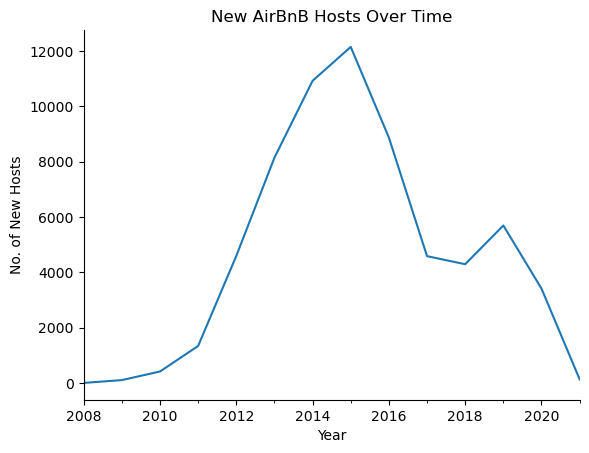

In [32]:
# Create two line charts: one showing the count of new hosts over time, and one showing average price..

paris_listings_over_time.plot(
    y = 'neighbourhood',
    title = 'New AirBnB Hosts Over Time',
    ylabel = 'No. of New Hosts',
    xlabel = 'Year',
    legend = None
)

sns.despine()

In Paris, when AirBnB became popular during 2008, the number of new hosts listing started to increase. After the 2015 regulations came to place, the number of new hosts drastically decreased.

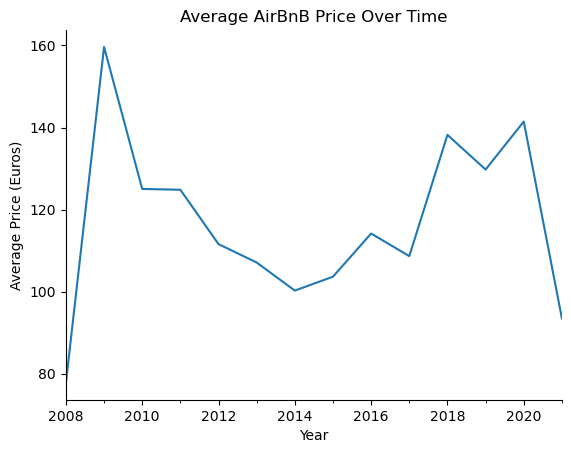

In [33]:
paris_listings_over_time.plot(
    y = 'price',
    title = 'Average AirBnB Price Over Time',
    ylabel = 'Average Price (Euros)',
    xlabel = 'Year',
    legend = None
)

sns.despine()

Initially as new hosts started to increase, we can see that the prices declined. After the 2015 regulations came into place, fewer hosts listed their properties and the prices started to increase. There's a price dip again after 2020 due to COVID-19 pandemic.

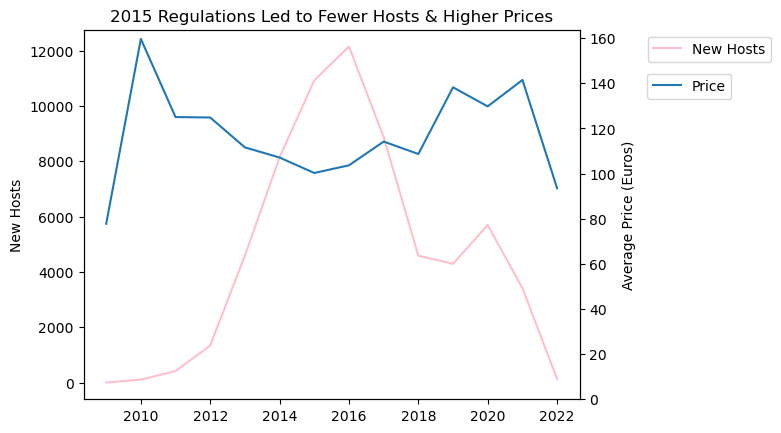

In [64]:
# Create a dual axis line chart to show both new hosts and average price over time

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['neighbourhood'],
    label = 'New Hosts',
    c = 'pink'
)
ax.set_ylabel('New Hosts')
plt.legend(bbox_to_anchor = (1.4,1))

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['price'],
    label = 'Price'
)

ax2.set_ylim(0)
ax2.set_ylabel('Average Price (Euros)')
ax.set_title('2015 Regulations Led to Fewer Hosts & Higher Prices')
plt.legend(bbox_to_anchor = (1.32,0.9))
plt.show()